# Matplotlib

Matplotlib is Python's basic plotting system.

In [1]:
# by convention, the pyplot module is loaded as the plt object
import matplotlib.pyplot as plt

# to have matplotlib functions appear inside this notebook wedo:
%matplotlib inline

## Line plot

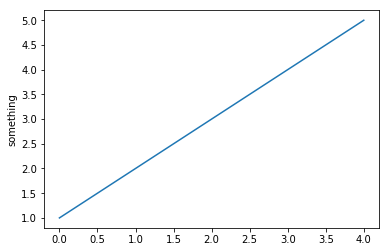

In [2]:
# notice how plt's state persists over calls, similar to R:
plt.plot([1, 2, 3, 4, 5])
plt.ylabel('something')
plt.show()

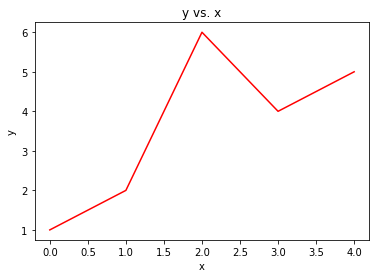

In [3]:
# providing both x and y, a title and a different color
plt.plot(range(5), [1, 2, 6, 4, 5], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs. x')
plt.show()

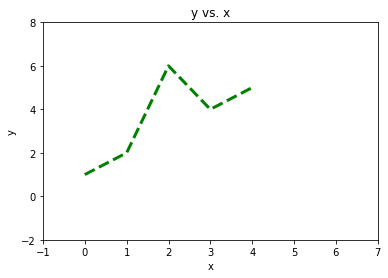

In [4]:
# providing a different color, different line type, controling limits of axes and line width
plt.plot(range(5), [1, 2, 6, 4, 5], 'g--', linewidth = 3)
plt.axis([-1, 7, -2, 8])
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs. x')
plt.show()

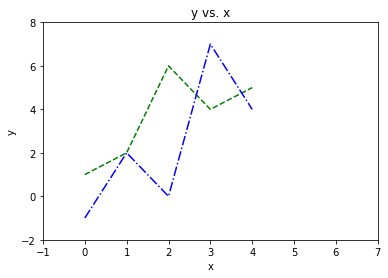

In [5]:
# another line
plt.plot(range(5), [1, 2, 6, 4, 5], 'g--', [-1, 2, 0, 7, 4], 'b-.')
plt.axis([-1, 7, -2, 8])
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs. x')
plt.show()

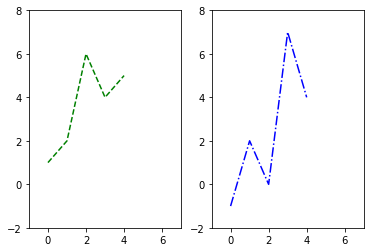

In [6]:
# two subplots, one next to the other:
plt.subplots(nrows = 1, ncols = 2)
plt.subplot(1, 2, 1)
plt.axis([-1, 7, -2, 8])
plt.plot(range(5), [1, 2, 6, 4, 5], 'g--')
plt.subplot(1, 2, 2)
plt.axis([-1, 7, -2, 8])
plt.plot(range(5), [-1, 2, 0, 7, 4], 'b-.')
plt.show()

See the [`plot()`](https://matplotlib.org/) documentation for more of these magical `g--` strings.

## Scatter plot

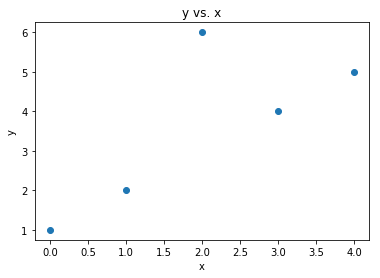

In [7]:
# first you can make a scatterplot by specifying you want dots instead of a line:
plt.plot(range(5), [1, 2, 6, 4, 5], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs. x')
plt.show()

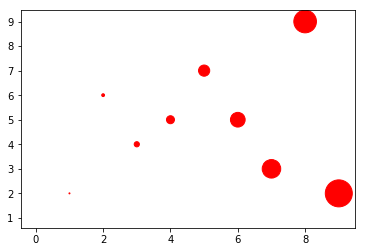

In [8]:
# but you also have plt.scatter() for better control:
plt.scatter(range(10), [1, 2, 6, 4, 5, 7, 5, 3, 9, 2], c = 'r', s = [i ** 3 for i in range(10)])
plt.show()

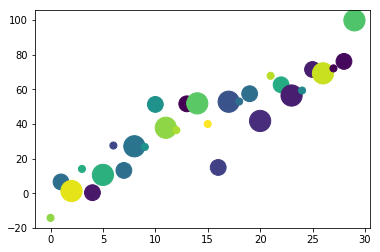

In [9]:
# getting boring, let's import numpy and generate more numbers
import numpy as np

x = np.arange(30)
y = x * 3 + 10 * np.random.randn(30)
color = np.random.randint(0, 50, 30)
size = np.tile(np.arange(50, 600, 200), (30,))

plt.scatter(x, y, c = color, s = size)
plt.show()

## Bar plot

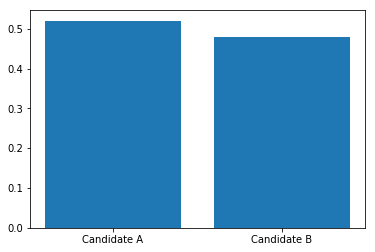

In [10]:
plt.bar([0, 1], [0.52, 0.48])
plt.xticks([0, 1], ['Candidate A', 'Candidate B'])
plt.show()

## Histogram

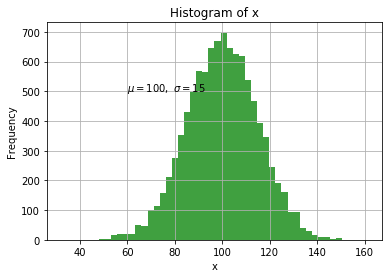

In [11]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
plt.hist(x, bins = 50, density = False, facecolor = 'g', alpha = 0.75)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of x')
plt.text(60, 500, r'$\mu=100,\ \sigma=15$')
plt.grid(True)
plt.show()

## Boxplot

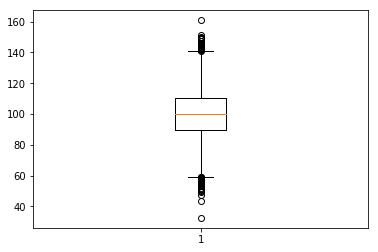

In [12]:
plt.boxplot(x)
plt.show()

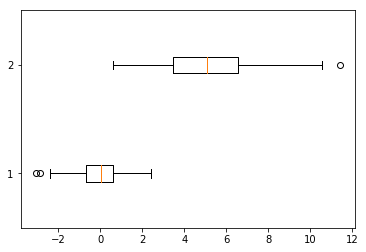

In [13]:
plt.boxplot([np.random.randn(100), 5 + 2 * np.random.randn(100)], vert = False)
plt.show()

# Seaborn

Seaborn was meant for fancier plotting, inspired by R's `ggplot2`. It plays well with `pandas` DataFrames.

In [14]:
# by convention, the seaborn module is loaded as the sns object
import seaborn as sns

# we also import matplotlib.pyplot, the plt object
import matplotlib.pyplot as plt

## Line plot

We can plot a line with `sns.lineplot()`, exactly as before, only now we have to provide an x axis:

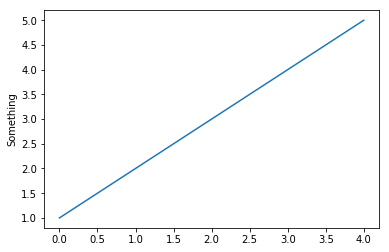

In [15]:
sns.lineplot(range(5), [1, 2, 3, 4, 5])
plt.ylabel('Something')
plt.show()

But this is not what seaborn was meant to do.

First, seaborn is prettier once you do:

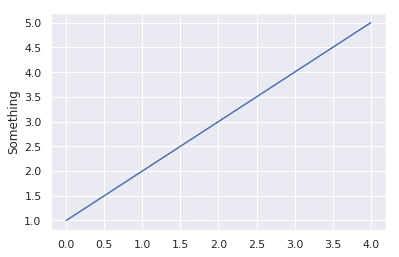

In [16]:
sns.set()

sns.lineplot(range(5), [1, 2, 3, 4, 5])
plt.ylabel('Something')
plt.show()

Second, seaborn was meant to work with pandas DataFrames:

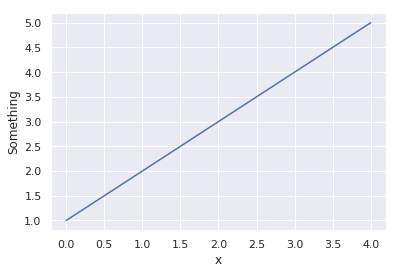

In [17]:
import pandas as pd

df = pd.DataFrame({'x': range(5), 'Something': [1, 2, 3, 4, 5]})

sns.lineplot(x = 'x', y = 'Something', data = df)
plt.show()

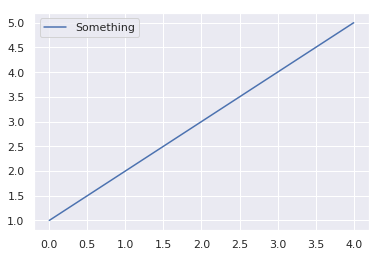

In [18]:
# this also works
sns.lineplot(data = df)
plt.show()

Lastly, seaborn is much more impressive with "tidy" rich datasets. Let's loadthe `tips` dataset (this will require internet connection):

In [19]:
tips = sns.load_dataset('tips')

tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


The `tips` dataset is "tidy" in the sense that each row variable is in its own column, and each observation is in its own row.

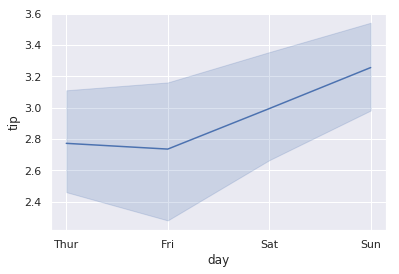

In [20]:
sns.lineplot('day', 'tip', data = tips)
plt.show()

We got the line showing the average tip per day, the strip representing a confidence interval for the mean.

We could group the data by day to see the means:

In [21]:
means_data = tips[['day', 'tip']].groupby('day').mean()

means_data

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


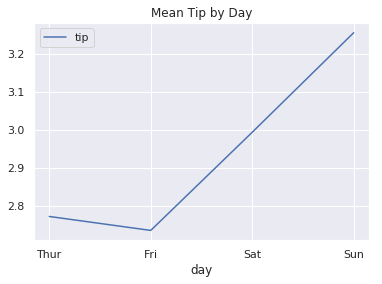

In [22]:
sns.lineplot(data = means_data)
plt.title('Mean Tip by Day')
plt.show()

But here's where seaborn becomes really handy, inspired by `ggplot2`: you get to specify another dimension by `hue`, `size` or `style`, usually a categorical variable, and you'll get separate lines:

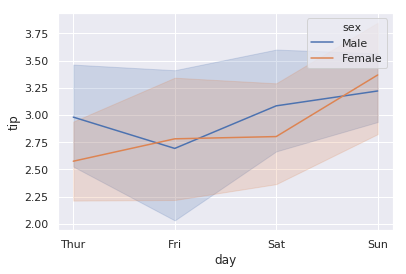

In [23]:
sns.lineplot('day', 'tip', hue = 'sex', data = tips)
plt.show()

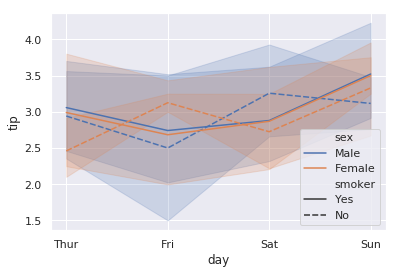

In [24]:
sns.lineplot('day', 'tip', hue = 'sex', style = 'smoker', data = tips)
plt.show()

## Scatter plot

## Bar plot

## Histogram

## Boxplot